## Code submission

If you would like to use Jupyter (perhaps the easiest way), just submit the notebook file to bCourses. Name it lastname_firstname_(Homework#).ipynb. For example, obama_barack_1.ipynb. This applies to the case if you **only** have a notebook file.

If you use MATLAB or Julia/Python (not the notebook), **or** if you have multiple files, name your programs as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). Then **zip everything** into a single file lastname_firstname_(Homework#).zip, and submit the zip file to bCourses. For example, obama_barack_1.zip.

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear and understandable.

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

## Problem 1

Derive explicitly the four-step Adams-Moulton method.

Assuming for $m = 0,1,\cdots,n+r-1$ we have:
\begin{equation}
y_m = y(t_m) + O(h^{r+1})
\end{equation}, where $r\ge 1$ is an integer.


In order to advance from $t_{n-r+1}$ to $t_{n+r}$, we need to use the principle:
\begin{equation}
y_{n+r} = y_{n+r-1} + \int_{t_{n+r-1}} ^ {t_{n+r}} y'(s) ds
\end{equation} where $y'(s) = f(s, y(s))$


To derive a numerical method, we need to approximate the integral. A reasonable approximation is the Lagrange interpolation polynomials matching the data points $f_m$ for $m=n,n+1,\cdots,n+r-1,n+r$, corresponding to the grid points evaluation at $t_n, t_{n+1}, \cdots, t_{n+r}$.

$\bullet$ The implicit method also incorporates the data point at $f_{n+r}$

$\bullet$ In this case, our $r = 4$, to derive Adam-Moulton-4 method.

To obtain the Lagrange interpolation of $f(t,y(t))$ on the right hand side: we have
\begin{equation}
p_k(t) = \prod_{j=0, j\neq k}^{4} (\frac{t-t_{n+j}}{t_{n+k}-t_{n+j}})
\end{equation}

\begin{equation}
f(t,y(t)) \approx \sum_{k=0}^4 f_{n+k} \prod_{j=0, j\neq k}^4 (\frac{t-t_{n+j}}{t_{n+k}-t_{n+j}})
\end{equation}

Put back in scheme, we have compactly that:
\begin{equation}
u_{n+4} - u_{n+3} = \int_{t+3}^{t+4} \sum_{k=0}^4 f_{n+k}p_k(s)ds
\end{equation}

\begin{equation}
= (h \bullet \frac{1}{h}) \int_{t+3}^{t+4} \sum_{k=0}^4 f_{n+k}p_k(s)ds
\end{equation}
\begin{equation}
= (h \bullet \frac{1}{h}) \sum_{k=0}^4 f_{n+k} \int_{t+3}^{t+4} p_k(s)ds
\end{equation}
Because $\int p_k$ is explicitly computable, it yields a constant, by rearranging algebraically:
\begin{equation}
u_{n+4} - u_{n+3} = h \sum_{k=0}^4 f_{n+k} \beta_{k}
\end{equation} where $\beta _k = \frac{1}{h} \int_{t_{n+3}} ^ {t_ {n+4}}p_k(s)ds$

Now we need only compute the coefficients by evaluating the integrals $\beta_0, \beta_1, \cdots, \beta_4$.
Assuming equally spaced grid, using the fact that $t_{n} = t_0 + nh$ where $h$ is $\Delta t$. We have the following:
\begin{equation}
    \beta_0 = -\frac{19}{720}
\end{equation}

\begin{equation}
    \beta_1 = \frac{106}{720}
\end{equation}

\begin{equation}
    \beta_2 = -\frac{264}{720}
\end{equation}

\begin{equation}
    \beta_3 = \frac{646}{720}
\end{equation}

\begin{equation}
    \beta_4 = \frac{251}{720}
\end{equation}

Plug back, by a simple renaming (shifting) of indices, and rearranging, we have the AM-4 scheme:
\begin{equation}
u_{n+1} = u_n + \frac{h}{720} (251f_{n+1} + 646f_{n} - 264f_{n-1} + 106f_{n-2} - 19f_{n-3}))
\end{equation}


## Problem 2

The $r$-step Nystrom method is given as follows: Replace $f(u(t),t)$ in the exact formulation below

$$u(t_{n+r})-u(t_{n+r-2}) = \int_{t_{n+r-2}}^{t_{n+r}} f(u(t),t) dt$$

by a Lagrange polynomial interpolating at $f_{n},\ldots,f_{n+r}$, where $f_{n+s}\equiv f(u_{n+s},t_{n+s})$. The explicit scheme similar to Adams-Bashforth method is called the Nystrom method.  The implicit scheme similar to Adams-Moulton method is called the Milne method.

a) Derive the Nystrom method with $r=1$ and $r=2$. Prove that both result in the same method, and prove that the LTE is of order $O(h^3)$.

b) Derive the Milne method with $r=2$, and prove that the LTE is of order $O(h^5)$.


a) 
(1) r = 1
For explicit Nyostrom methods we consider:
\begin{equation}
y(t_{n+1}) = y(t_{n-1}) + \int_{t_{n-1}} ^{t_{n+1}} f(t, y(t)) dt
\end{equation}
where we replace $f(t, y(t))$ with an interpolating polynomial of degree $r-1$ to advance two steps, namely, an interpolating polynomial incorporating data points at $f_n, f_{n+1}, \cdots, f_{n+r-1}, f_{n+r}$, matching time steps $t_n, \cdots, t_{n+r}$.
When $r=1$, we only incorporate 1 data point, $f_n$, for the explicit method. 
In such a case, $f(t, y(t)) \approx p_0(t)$ is a constant polynomial $f_n$. Therefore, plugging back:

\begin{equation}
y(t_{n+1}) = y(t_{n-1}) + \int_{t_{n-1}} ^{t_{n+1}} f_n dt
\end{equation}
assuming equally spaced grid, we have $t_n = t_0 + nh$
\begin{equation}
y(t_{n+1}) = y(t_{n-1}) + 2hf_n
\end{equation}

(2) r = 2
We now incorporate 2 data points, namely, $ f_n, f_{n+1} $ to advance from $t_n$ to $t_{n+2}$. Therefore, we consider:
\begin{equation}
y(t_{n+2}) = y(t_n) + \int_{t_n} ^{t_{n+2}} f(t, y(t)) dt
\end{equation}

As usual, we replace $\int_{t_n} ^{t_{n+2}} f(t, y(t)) dt$ with a quadrature, incorporating data points $f_n, f_{n+1}$. Therefore we have by Lagrange interpolation formula:

\begin{equation}
\int_{t_n} ^{t_{n+2}} f(t, y(t)) dt = \int_{t_n} ^{t_{n+2}} (\frac{t-t_n}{t_{n+1}-t_n} \bullet f_{n+1}) +  (\frac{t-t_{n+1}}{t_n - t_{n+1}} \bullet f_n) dt
\end{equation}

Using the assumption of equally spaced grid and $t_n = t_0 + nh$, we can explicitly integrate the polynomials:
\begin{equation}
\int_{t_n} ^{t_{n+2}} (\frac{t-t_n}{t_{n+1}-t_n} \bullet f_{n+1}) +  (\frac{t-t_{n+1}}{t_n - t_{n+1}} \bullet f_n) dt = 2 f_{n+1} + 0 f_n
\end{equation}

By a shift (renaming) of indices; Thus yielding the method: $y(t_{n+1}) = y(t_{n-1}) + 2hf_n$ which is identical to $r=0$.

(3) We would like to verify the order of LTE:


By [Ise].2.2 Theorem 2.1: A linear multistep method is of order $p \ge 1$ if and only if there exists $c \neq 0$ such that:
\begin{equation}
\rho (w) - \sigma(w) ln(w) = c(w - 1) ^ {p+1} + O(|w-1|^{p+2})
\end{equation} where $w \rightarrow 1$. 

Namely, we can consider the characteristic polynomials for our Nyostrom method:
\begin{equation}
y(t_{n+1}) = y(t_{n-1}) + 2hf_n
\end{equation}
or by shifting index and renaming,
\begin{equation}
y(t_{n+2}) - y(t_{n}) = h (2 f_{n+1})
\end{equation}

Corresponding to the characteristic polynomials: $ \rho(w) = w^2 - 1 = (w+1)(w-1) $ and $\sigma(w) = 2w $. For convinience, we substitute and let $\phi = w - 1$, note that this transformation is linear, and therefore we need only show $\phi$'s order, therefore we have:
\begin{equation}
\rho (w) - \sigma(w) log(w) = \phi(\phi+2) - (2\phi + 2)log(\phi + 1)
\end{equation}

By the property of the $log(1+x)$ function, we can using an expansion: $log(1+\phi) = \phi - \frac{1}{2}\phi^2 + O(\phi^3)$

Plugging back, we obtain:
\begin{equation}
\phi (\phi+2) - (\phi + 1)log(\phi + 1) = \phi^2 +2\phi -(2\phi +2)(\phi-\frac{1}{2}\phi^2 + O(\phi^3))
\end{equation}

\begin{equation}
= \phi^2 + 2\phi - (2\phi^2 - \phi^3 + O(\phi^4) + 2\phi - \phi^2 + O(\phi^3))
\end{equation}

collect terms, we eventually have $O(\phi^3) + O(\phi^4)$, dropping the 4th order term, we have thus verified that our method is of 3rd order.

b) Derive the Milne method with $r=2$, and prove that the LTE is of order $O(h^5)$.

Consider again the integral equation:
\begin{equation}
y(t_{n+r}) = y(t_{n+r-2}) + \int_{t_{n+r-2}}^{t_{n+r}}f(t, y(t)) dt
\end{equation}

In the $r=2$ case, for an implicit method, our Lagrange interpolation polynomial incorporates data points at $f_n, f_{n+1}, f_{n+2}$, yielding a degree 2 polynomial $p_2(t)$

Therefore we have:
\begin{equation}
y(t_{n+2}) = y(t_n) + \int_{t_n}^{t_{n+2}}f(t, y(t))dt
\end{equation}

We replace $\int_{t_n}^{t_{n+2}}f(t, y(t))dt$ with the polynomial $p_2(t)$:
\begin{equation}
\int_{t_n} ^{t_{n+2}} f(t, y(t)) dt = \int_{t_n} ^{t_{n+2}} \frac{(t-t_{n+1}) (t-t_{n+2})}{(t_n-t_{n+1}) (t_n-t_{n+2})}f_n + \frac{(t-t_n) (t-t_{n+2})} {(t_{n+1}-t_n) (t_{n+1}-t_{n+2})}f_{n+1} +
\frac{(t-t_n) (t-t_{n+1})} {(t_{n+2}-t_n) (t_{n+2}-t_{n+1})}f_{n+2} dt
\end{equation}

Using the assumption of equally spaced grid, we can explicitly integrate the polynomials using $t_{n+1} = t_n + h$.
\begin{equation}
\int_{0} ^{2h} f(t, y(t)) dt = \int_0 ^{2h} \frac{(t-h) (t-2h)}{(-h) (-2h)}f_n + \frac{(t) (t-2h)} {(h) (-h)}f_{n+1} +
\frac{(t) (t-h)} {(2h) (h)}f_{n+2} dt
\end{equation}

After integration, plug back, we have:
\begin{equation}
y_{n+2} = y_n + h(\frac{1}{3} f_{n+2} + \frac{4}{3} f_{n+1} + \frac{1}{3} f_n)
\end{equation}

By a simple shift of index (renaming), we have the Milne-2 method
\begin{equation}
y_{n+1} = y_{n-1} + h(\frac{1}{3} f_{n+1} + \frac{4}{3} f_n + \frac{1}{3} f_{n-1})
\end{equation}

Now, we would like to check its order of accuracy. We have:
\begin{equation}
y_{n+2} - y_n = h(\frac{1}{3} f_{n+2} + \frac{4}{3} f_{n+1} + \frac{1}{3} f_n)
\end{equation}

Considering its characteristic polynomial, we have $\rho (w) = w^2 - 1$ and $\sigma(w) = \frac{1}{3}w^2 + \frac{4}{3}w + \frac{1}{3}$ and let $\phi = w-1$.

\begin{equation}
\rho (w) - \sigma(w) log(w) = (w+1)(w-1)-\frac{1}{3}(w^2+4w+1)log(w)
\\
= \phi(\phi+2) - \frac{1}{3} (\phi^2 + 6\phi + 6) log(1+\phi)
\end{equation}

By the property of the $log(1+x)$ function, we can use an expansion: $log(1+\phi) = \phi - \frac{1}{2}\phi^2 + +\frac{1}{3}\phi^3 - \frac{1}{4} \phi^4 + O(\phi^5)$

We have:
\begin{equation}
\rho (w) - \sigma(w) log(w) = (w+1)(w-1)-\frac{1}{3}(w^2+4w+1)log(w)
\\
= \phi(\phi+2) - \frac{1}{3} (\phi^2 + 6\phi + 6) log(1+\phi)
\\
= \phi^2 + 2\phi - \frac{1}{3}(\phi^3 - \frac{1}{2}\phi^4 + \frac{1}{3} \phi^5 - \frac{1}{4} \phi^6 + O(\phi^7)
+ 6\phi^2 - 3\phi^3 + 2\phi^4 - \frac{3}{2}\phi^5 + O(\phi^6)
+ 6\phi - 3\phi^2 + 2\phi^3 - \frac{3}{2}\phi^4 + O(\phi^5))
\end{equation}

Ignoring higher order terms, and colleting, we obtain at last: $-\frac{7}{6}\phi^5 + O(\phi^5)+O(\phi^6)$, namely the method is $O(\phi^5)$ accurate.

## Problem 3

The Rabi oscillation in quantum physics can be modeled by the following ODEs
$$
\begin{split}
i\partial_t u_1(t) &= \Omega \cos (\omega t) u_2(t),\\
i\partial_t u_2(t) &= \Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t).
\end{split}
$$

This model describes the transition of an electron from state 1 to state 2 under an external electric field $\mathcal{E}(t)=\Omega \cos(\omega t)$. $u_1(t),u_2(t)\in \mathbb{C}$, and $\Omega_0$ is the energy gap between the two states.


Given Initial condition $u_1(0)=1,u_2(0)=0$, and $\Omega_0=2\pi,\Omega=1.0$.  Implement the 4th order Runge-Kutta method (rk4) which returns the full trajectory of the two components of $u$ as $u[1,:]$ and $u[2,:]$.

a) Use the RK4 scheme with $\Delta t = 0.1$ to solve this equation and plot out the trajectory of $|u_1(t)|^2$,$|u_2(t)|^2$ on the interval $[0,10\pi]$ for $\omega=\pi$. Do the same calculation for $\omega=2\pi$ and you should observe the resonance behavior (i.e. $|u_2|$ can reach 1.0 at some t).

b) Prove that $A(t)=|u_1(t)|^2+|u_2(t)|^2$ is a conserved quantity along the trajectory.

c) Plot $A(t)-1$ obtained from the RK4 scheme using $h=0.1$ and $0.01$, respectively. 

For convenience, we have the RK-4 method:
\begin{equation}
    \begin{split}
k_1 = f(t_n, y(t_n))
\\ k_2 = f(t_n+\frac{1}{2}h, y(t_n)+\frac{1}{2}hk_1)
\\ k_3 = f(t_n+\frac{1}{2}h, y(t_n)+\frac{1}{2}hk_2)
\\ k_4 = f(y(t_n)+hk_3, t_n + h)
\\ y(t_{n+1}) = y(t_n) + \frac{h}{6} (k_1 + 2k_2 + 2_k3 + k_4)
    \end{split}
\end{equation}

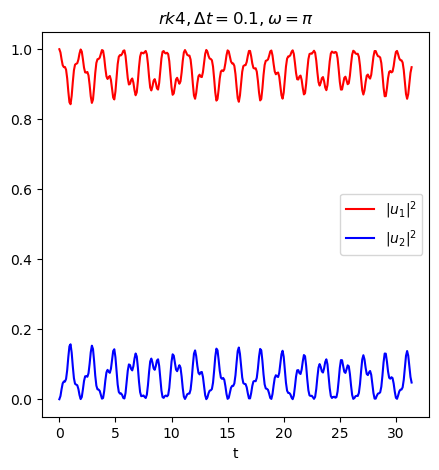

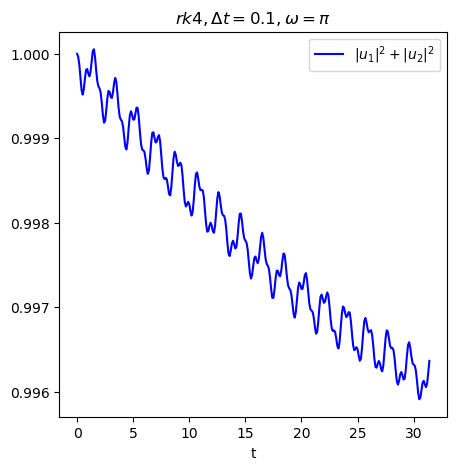

PyObject <matplotlib.legend.Legend object at 0x133795cf8>

In [1]:
using LinearAlgebra 

function func(u,t,Omega,Omega0,w)
    # assuming u is (u1, u2) a 2x1 vector
    u1 = u[1];
    u2 = u[2];
    i = im;
    f_u = [(Omega/i)*cos(w*t)*u2, (Omega0/i)*u2 + (Omega/i)*cos(w*t)*u1];
    return f_u
end

function rk4(N,T,u0,Omega,Omega0,w)
    u = zeros(Complex{Float64}, 2,N+1)
    h = T/N # calculate step size
    timesteps = 0:h:T
    u[:,1] = u0 # put in our first u0
    for i in 1:N
        t = timesteps[i];
        u_tn = u[:,i];
        k1 = func(u_tn, t, Omega, Omega0, w); # note that this returns a 2x1 vector
        k2 = func(u_tn + 0.5*h*k1, t+0.5*h, Omega, Omega0, w);
        k3 = func(u_tn+0.5*h*k2, t+h, Omega, Omega0, w)
        k4 = func(u_tn + h*k3, t+h, Omega, Omega0, w);
        u[:,i+1] = u_tn + (h/6)*(k1 + 2*k2 + 2*k3 + k4);
    end
    
    return u
end


using PyPlot

##############################
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w)


figure(1,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.1,\omega=\pi")
figure(2,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2),"b-",label=L"$|u_1|^2+|u_2|^2$")
xlabel("t")
title(L"rk4,\Delta t=0.1,\omega=\pi")
legend()

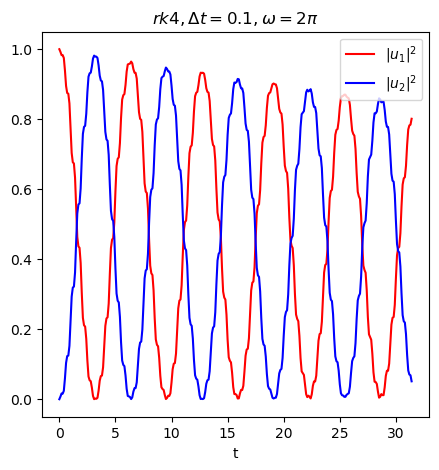

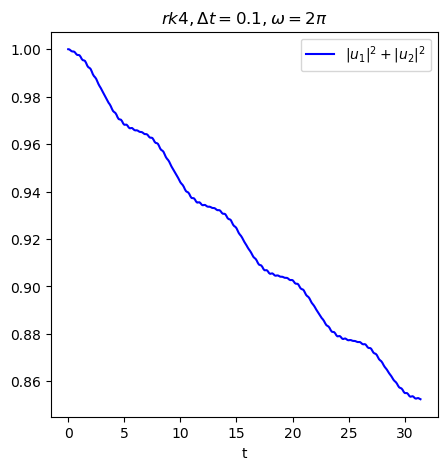

PyObject <matplotlib.legend.Legend object at 0x137e587b8>

In [2]:
# As specified, we perform the same operation w = 2pi
using PyPlot

##############################

# Observe resonance behavior
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = 2*pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w)


figure(1,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.1,\omega=2\pi")
figure(2,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2),"b-",label=L"$|u_1|^2+|u_2|^2$")
xlabel("t")
title(L"rk4,\Delta t=0.1,\omega=2\pi")
legend()

b) Prove that $A(t)=|u_1(t)|^2+|u_2(t)|^2$ is a conserved quantity along the trajectory.

In order to prove that the quantity $A(t)$ is conserved, we consider its derivative, and try reason that $\partial_t A(t)$ results in $0$, proving that $A(t)$ is constant.

We have:
$$
\begin{split}
i\partial_t u_1(t) &= \Omega \cos (\omega t) u_2(t),\\
i\partial_t u_2(t) &= \Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t).
\end{split}
$$

$\mathcal{E}(t)=\Omega \cos(\omega t)$. and $\Omega_0$ is constant.

By rearranging (fact: $\frac{1}{i} = -i$):
$$
\begin{split}
\partial_t u_1(t) &= -i(\Omega \cos (\omega t) u_2(t)),\\
\partial_t u_2(t) &= -i(\Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t)).
\end{split}
$$

Because $u_1(t),u_2(t)\in \mathbb{C}$ are complex functions of $t$, we can express them in terms of their real part and imaginary part. That is:
$$
\begin{split}
u_1(t) = a_1(t) + b_1(t)i \\
u_2(t) = a_2(t) + b_2(t)i
\end{split}
$$ where $a_1(t), a_2(t) = \Re(u1), \Re(u2)$ and $b_1(t), b_2(t) = \Im(u1), \Im(u2)$.

For simplicity of expression in the proof, we drop the $(t)$ for the functions, and noting they are functions of $t$. i.e. for example, express $u_1(t)$ as $u_1$.

We have:
\begin{equation}
A = |u_1|^2 + |u_2|^2 = u_1\bar{u_1} + u_2\bar{u_2} \\
\partial A = \partial u_1 \bar{u_1} + \partial \bar{u_1} u_1 + \partial u_2 \bar{u_2} + \partial \bar{u_2} u_2
\end{equation}

We have:
\begin{split}
u_1 = a_1 + b_1i \\
u_2 = a_2 + b_2i
\end{split}

and
\begin{split}
\bar{u_1} = a_1 - b_1i \\
\bar{u_2} = a_2 - b_2i
\end{split}

Substituting in $u_1, u_2$, we have:
\begin{equation}
\partial u_1 = -i(\mathcal{E}(a_2 + b_2 i)) = \mathcal{E}b_2 - \mathcal{E}a_2i
\partial u_2 = -i(\Omega_0((a_2 + b_2 i) + \mathcal{E}(a_1 + b_1i))) = (\Omega_0 b_2 + \mathcal{E}b_1) - (\Omega_0 a_2 + \mathcal{E} a_1)i
\end{equation}

Using an identity, for a continuous function $f(t)$, we have $\bar{(f')} = (\bar{f})'$:
Therefore we can substitute all identities we have obtained so far:

First part:
\begin{equation}
\partial u_1 \bar{u_1} + \partial \bar{u_1} u_1
   = \mathcal{E}a_1 b_2 - \mathcal{E} b_1 b_2 i - \mathcal{E} a_1 a_2 i - \mathcal{E} b_1 a_2 +
     \mathcal{E}a_1 b_2 + \mathcal{E} b_1 b_2 i + \mathcal{E} a_1 a_2 i - \mathcal{E} b_1 a_2
     \\
   = 2\mathcal{E} (a_1 b_2 - a_2 b_1)
\end{equation}


Second part:
\begin{equation}
\partial u_2 \bar{u_2} + \partial \bar{u_2} u_2
   = ( (\Omega_0 b_2 + \mathcal{E} b_1) - (\Omega_0 a_2 + \mathcal{E} a_1)i ) (a_2 - b_2 i)
   + ( (\Omega_0 b_2 + \mathcal{E} b_1) + (\Omega_0 a_2 + \mathcal{E} a_1)i ) (a_2 + b_2 i)
   \\
   = a_2(\Omega_0 b_2 + \mathcal{E} b_1) - a_2(\Omega_0 a_2 + \mathcal{E} a_1)i - b_2(\Omega_0 b_2 + \mathcal{E} b_1)
   + a_2(\Omega_0 b_2 + \mathcal{E} b_1) + a_2(\Omega_0 a_2 + \mathcal{E} a_1)i + b_2(\Omega_0 b_2 + \mathcal{E} b_1)
   \\
   = 2\mathcal{E}a_2 b_1 - 2\mathcal{E}a_1 b_2
\end{equation}

Collecting the terms in part 1 and part 2, it is obvious that:
$
A' = 2\mathcal{E}a_1 b_2 - 2\mathcal{E}a_2 b_1 + 2\mathcal{E}a_2 b_1 - 2\mathcal{E}a_1 b_2 = 0
$

As shown above, $A'(t) = 0$, we must have $A(t) = \mathcal{C}$ be a conserved quantity. 



c) Plot $A(t)-1$ obtained from the RK4 scheme using $h=0.1$ and $0.01$, respectively. 

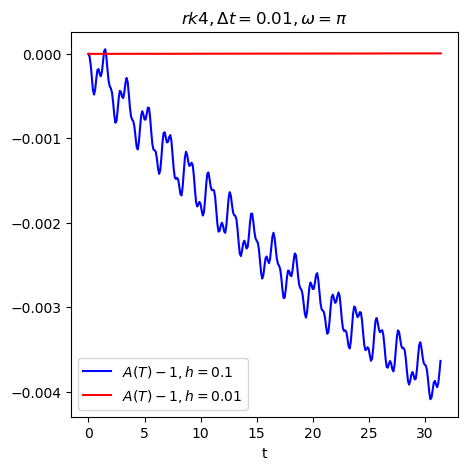

observe conserved quantity

In [87]:
########## h = dt = 0.1
# set up
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w)

figure(2,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2 .- 1),"b-",label=L"$A(T) - 1, h=0.1$")
xlabel("t")
title(L"rk4,\Delta t=0.1,\omega=\pi")
legend()

########## h = dt = 0.01
# set up
T = 10.0*pi
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w)

figure(2,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2 .- 1),color="red","b-",label=L"$A(T) - 1, h=0.01$")
xlabel("t")
title(L"rk4,\Delta t=0.01,\omega=\pi")
legend()

print("observe conserved quantity")

## Problem 4


Consider the heat equation in 1D with periodic boundary conditions

$$u_t(x,t) = u_{xx}(x,t),\quad x\in [0,2\pi],$$

$$u(x,0)=e^{-5(x-\pi)^2}, \quad u(0,t)=u(2\pi,t), u_x(0,t)=u_x(2\pi,t)$$

Here $\varepsilon = 1.0$. Use the central finite difference scheme to discretize $u_{xx}(x,t)$, with a uniform grid spacing $\Delta x=2\pi/100$, i.e.

$$u_{xx}(x_i,t_n)\approx \frac{u(x_i+\Delta x,t_n)-2u(x_i,t_n)+u(x_i-\Delta x,t_n)}{\Delta x^2}.$$



Obtain the solution $u(x,T)$ at $T=1.0$ using the following methods.

a) Implement a `ForwardEuler` method, using the forward Euler for time discretization and $h =0.001$. What would happen if you use a time step $h=0.01$?

b) Implement a `Trapezoid` method, using a trapezoidal rule for time discretization and use $h=0.1$. Since the equation is linear, you can solve a linear equation to treat this implicit scheme.

c) Implement a `TrapezoidAB2` method, which uses an adaptive time stepping strategy (with the "Milne device") propagated by the trapezoidal rule, with its error estimated on-the-fly from the Adams-Bashforth 2nd order scheme.  The initial time step is $h=0.001$. Plot out the history of the size step along the history of the simulation. 

Read [Ise] Chap 6.2 if needed for more information. Some "sloppiness" in the interpolation procedure can be tolerated if it makes the implementation easier.

**Note**: You should implement this example using **sparse matrices** whenever possible. See 

https://docs.julialang.org/en/v1/stdlib/SparseArrays/index.html

for references on sparse linear algebra.


Due to space discretization, we can view the partial derivative with respect to time as a single function with a fixed x at each grid point, therefore we have the system of equations in $t$:
\begin{equation}
\dot{u}_0 (t) = u_t(0, t) = \frac{1}{\Delta x^2} (u_1 - 2u_0 + u_{-1}) \\
\dot{u}_1 (t) = u_t(\Delta x, t) = \frac{1}{\Delta x^2} (u_2 - 2u_1 + u_0) \\
\dot{u}_2 (t) = u_t(2\Delta x, t) = \frac{1}{\Delta x^2} (u_3 - 2u_2 + u_1) \\ 
\vdots \\
\dot{u}_N (t) = u_t(N\Delta x, t) = \frac{1}{\Delta x^2} (u_{N+1} - 2u_N + u_{N-1})
\end{equation}

Because of the periodicity, we can replace $u_{-1}, u_{N+1}$ by $u_N, u_0$. Compactly, this can be represented by:
\begin{equation}
\mathbf{\dot{u}_t} = \frac{1}{\Delta x^2} \mathbf{A} \mathbf{u}
\end{equation}, where $\mathbf{A}$ is:
$
\begin{pmatrix}
    -2 & 1 & 0 & \dots & 0 & 1 \\
    1 & -2 & 1 & 0 & \dots & 0 \\
      & \ddots & \ddots & \ddots & \vdots & \vdots \\
      & & \ddots & \ddots & \ddots \\
      0 & \dots & 0 & 1 & -2 & 1 \\
      1 & 0 & \dots & 0 & 1 & -2
\end{pmatrix}
$, implementing the periodic boundary conditions:
\begin{equation}
\quad u(0,t)=u(2\pi,t), u_x(0,t)=u_x(2\pi,t)
\end{equation}

Then for Forward Euler we can directly compute (advancing time steps $t_n \rightarrow t_{n+1}$) via:
\begin{equation}
    \mathbf{u_{n+1}} = \mathbf{u_n} + h\mathbf{\dot{u_t}}
\end{equation} where $\mathbf{\dot{u_t}}$ is computed in the abovementioned matrix multiplication and yields an $(N+1) \times 1$ vector.

The spatial discretization yields values of $x$, namely, $x = 0, \Delta x, 2\Delta x, \dots, 2\pi$. With our initial condition at $t=0$, it is given:
\begin{equation}
u(x,0)=e^{-5(x-\pi)^2}
\end{equation}
This means by plugging in the fixed $x$, we can compute our initial value $u_0$ (i.e. $u(t=0)$) explicitly.

a) Implement a `ForwardEuler` method, using the forward Euler for time discretization and $h =0.001$. What would happen if you use a time step $h=0.01$?

In [88]:
using SparseArrays
using LinearAlgebra
# (1) Implement ForwardEuler...

# Set up, initial condition
function initial(X)
    #= This is a helper function that takes in X a vector of discretized spatial points, and 
    returns a vector representing u_0 our initial value at t=0 =#
    return exp.(((-5) * ((X .- pi).^2)))
end
dx = (2 * pi) / 100;
discretizedSpaceArray = collect(0:dx:2*pi);
u0 = initial(discretizedSpaceArray); len_u = length(u0);
T = 1.0;
# Create sparse matrix representing the central finite difference rule
# Create entries in A
A = spzeros(len_u, len_u);
A[1, 1] = -2; A[1, 2] = 1; A[1, end] = 1;
A[end, 1] = 1; A[end, end - 1] = 1; A[end, end] = -2;
for row in 2:(len_u-1)
    A[row, row-1] = 1;
    A[row, row] = -2;
    A[row, row+1] = 1;
end
# A loaded successfully

#= A helper function representing the right hand side of u' = F(u) =#
function func(u, dx)
   return (1/(dx)^2) .* (A * u)
end

function ForwardEuler(h, T, u0)
    #= Forward euler method dealing with a system of equations =#
    # len_sol: length of solution
    len_sol = length(collect(0:h:T))
    
    U = zeros(len_u, len_sol) # store results
    U[:, 1] = u0
    for i in 1:len_sol-1
        U[:, i+1] = U[:, i] + h * func(U[:, i], dx);
    end
    return U[:, end]
end

########## Compute solution to (a)
#a.using step size h=0.001
h = 0.001; T = 1.0;
uT1 = ForwardEuler(h, T, u0)
display(uT1)
#b. what happens if I use h=0.01?
print("Now using h = 0.01: ")
h = 0.01; T = 1.0;
uT2 = ForwardEuler(h, T, u0)
uT2 # solution blows up

100-element Array{Float64,1}:
 0.04163146120307465 
 0.041776252683112094
 0.04221039660412845 
 0.04293319715581085 
 0.043943480568224516
 0.0452395742987791  
 0.04681927852163517 
 0.04867983053669756 
 0.05081786287675401 
 0.05322935604170952 
 0.055909586925980935
 0.058853074126810366
 0.06205352142553646 
 ⋮                   
 0.06205352142553645 
 0.05885307412681035 
 0.05590958692598092 
 0.05322935604170951 
 0.050817862876754   
 0.048679830536697555
 0.04681927852163516 
 0.045239574298779096
 0.043943480568224516
 0.04293319715581085 
 0.04221039660412845 
 0.041776252683112094

Now using h = 0.01: 

100-element Array{Float64,1}:
 -2.31225056192568e73  
 -3.076842188240978e73 
  9.516775863487006e73 
 -1.8834206594451887e74
  3.3195284769930797e74
 -5.535258198697419e74 
  8.876782092354011e74 
 -1.3750040433034053e75
  2.056559357990583e75 
 -2.960580761148762e75 
  4.076378102611533e75 
 -5.3083006551746765e75
  6.4004345099529456e75
  ⋮                    
 -2.8136605066704395e76
  1.8783474523622958e76
 -1.2264093792054864e76
  7.829576180017664e75 
 -4.886445207971127e75 
  2.9809156697947267e75
 -1.7775874142870777e75
  1.036450633996081e75 
 -5.909592508255053e74 
  3.287987597879577e74 
 -1.7603600691621602e74
  8.466203231019437e73 

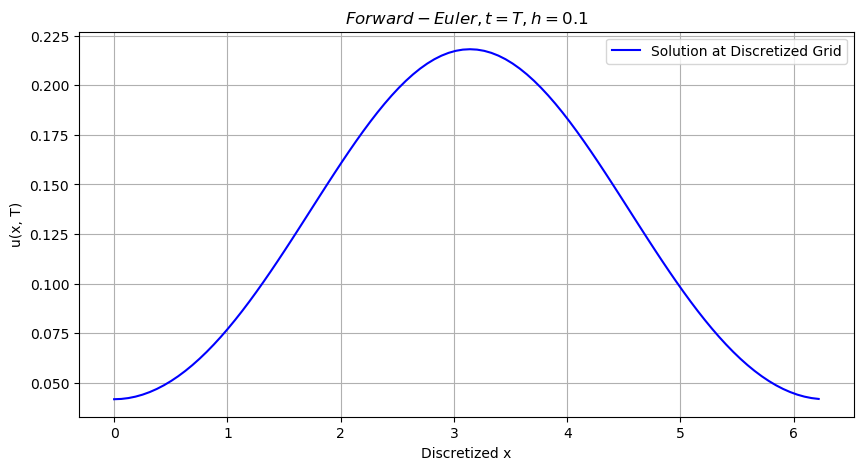

PyObject Text(0.5, 1, '$Forward-Euler,t=T,h=0.1$')

In [89]:
X = [0:2*pi/100:2*pi;]
figure(1,figsize=(10,5))
plot(X, uT1, "b-",label="Solution at Discretized Grid")
xlabel("Discretized x")
ylabel("u(x, T)")
legend()
grid("on")
title(L"Forward-Euler,t=T,h=0.1")

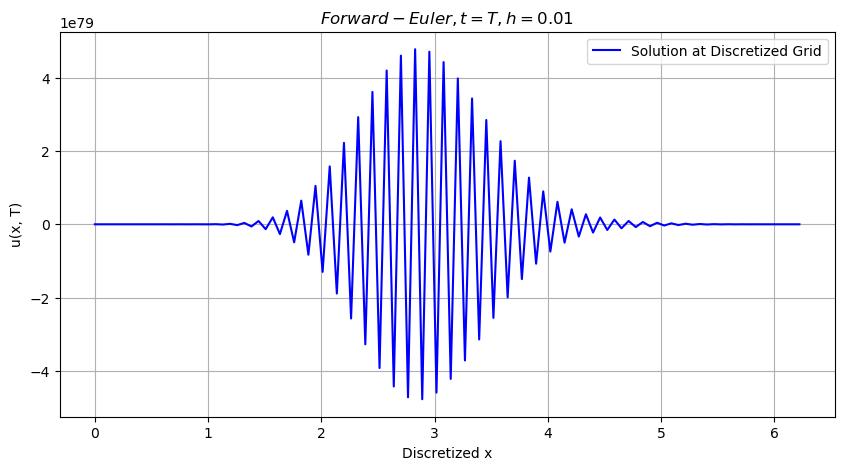

PyObject Text(0.5, 1, '$Forward-Euler,t=T,h=0.01$')

In [90]:
X = [0:2*pi/100:2*pi;]
figure(1,figsize=(10,5))
plot(X, uT2, "b-",label="Solution at Discretized Grid")
xlabel("Discretized x")
ylabel("u(x, T)")
legend()
grid("on")
title(L"Forward-Euler,t=T,h=0.01")

b) Implement a `Trapezoid` method, using a trapezoidal rule for time discretization and use $h=0.1$. Since the equation is linear, you can solve a linear equation to treat this implicit scheme.

(2) Now start problem 4(2):

First we write down Trapezoidal rule:
\begin{equation}
    \mathbf{u_{n+1}} = \mathbf{u_n} + \frac{1}{2} h (\mathbf{f_n} + \mathbf{f_{n+1}})
\end{equation}

Since our rule is linear, we can directly solve for the Trapezoidal result. By noting:
\begin{equation}
    \mathbf{u_{n+1}} = \mathbf{u_n} + \frac{1}{2}h (f(\mathbf{u_n}) + f(\mathbf{u_{n+1}})) \\
    \mathbf{u_{n+1}} = \mathbf{u_n} + \frac{1}{2\Delta x^2}h (A\mathbf{u_n} + A\mathbf{u_{n+1}}) \\
    \mathbf{u_{n+1}} = (I - \frac{h}{2\Delta x^2} A)^{-1} (I + \frac{h}{2\Delta x^2}A) \mathbf{u_n}
\end{equation}


100-element Array{Float64,1}:
 0.041499217194354114
 0.041645129627973315
 0.042082619715860206
 0.04281094224865292 
 0.043828843337667976
 0.045134542693159724
 0.04672570895256373 
 0.048599428127754765
 0.050752165203217375
 0.05317971890891411 
 0.05587716979013294 
 0.05883882200486196 
 0.062058139907681914
 ⋮                   
 0.06205813990768138 
 0.05883882200486144 
 0.05587716979013251 
 0.05317971890891368 
 0.05075216520321704 
 0.04859942812775443 
 0.04672570895256346 
 0.045134542693159474
 0.04382884333766777 
 0.042810942248652784
 0.042082619715860116
 0.04164512962797324 

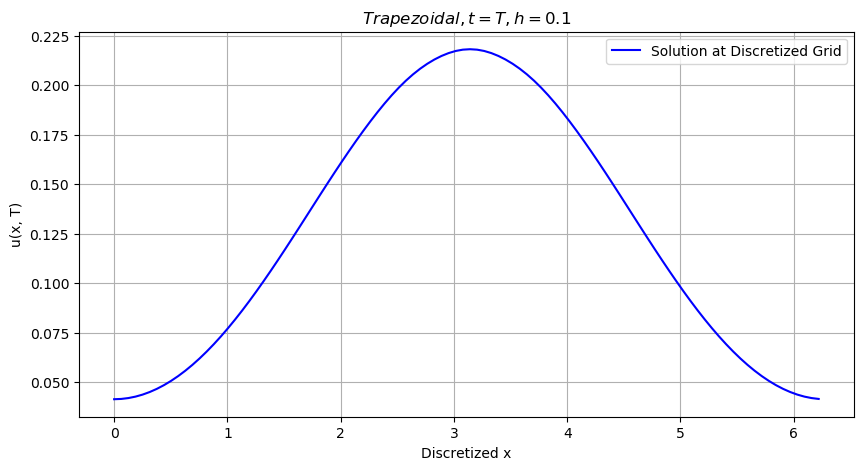

PyObject Text(0.5, 1, '$Trapezoidal,t=T,h=0.1$')

In [91]:
function Trapezoid(h, T, u0)
    #= Trapezoidal method dealing with a system of equations, rule specified as above =#
    len_sol = length(collect(0:h:T))
    U = zeros(len_u, len_sol) # store results
    U[:, 1] = u0
    # Trapezoidal rule:
    # un+1 = un + h/2(Aun + Aun+1) => un+1 = [I - (h/2)A]^(-1) * [I + (h/2)*A] un
    id = Matrix(I, len_u, len_u);
    for i in 1:len_sol-1
        U[:,i+1] = inv(id - (h/(2*dx^2))*A ) *  ( id + (h/(2*dx^2))*A ) * U[:,i] 
    end
    u = U[:, end]
    return u
end

################ Compute using h = 0.1
h = 0.1; T = 1.0;
uT3 = Trapezoid(h, T, u0)
display(uT3)

################ Plotting to show solution
X = [0:2*pi/100:2*pi;]
figure(1,figsize=(10,5))
plot(X, uT3, "b-",label="Solution at Discretized Grid")
xlabel("Discretized x")
ylabel("u(x, T)")
legend()
grid("on")
title(L"Trapezoidal,t=T,h=0.1")

c) Implement a `TrapezoidAB2` method, which uses an adaptive time stepping strategy (with the "Milne device") propagated by the trapezoidal rule, with its error estimated on-the-fly from the Adams-Bashforth 2nd order scheme.  The initial time step is $h=0.001$. Plot out the history of the size step along the history of the simulation. 

Read [Ise] Chap 6.2 if needed for more information. Some "sloppiness" in the interpolation procedure can be tolerated if it makes the implementation easier.

The AB2 Method is as follows:
\begin{equation}
u_{n+1} = u_n + h(\frac{3}{2}f_n - \frac{1}{2}f_{n-1})
\end{equation}

The Trapezoidal rule:
\begin{equation}
\mathbf{u_{n+1}} = (I - \frac{h}{2\Delta x^2} A)^{-1} (I + \frac{h}{2\Delta x^2}A) \mathbf{u_n}
\end{equation}

In [2]:
# Begin (c)

#= Set up variables for the methods =#
h0 = 0.001; # initial time step
T = 1.0;
dx = (2 * pi) / 100;
discretizedSpaceArray = collect(0:dx:2*pi);
u0 = initial(discretizedSpaceArray); len_u = length(u0);

UndefVarError: UndefVarError: initial not defined

Milne device:

We use the Trapezoidal rule to propagate:
\begin{equation}
    y_{n+1} = y_n + \frac{1}{2} h (f(t_{n+1}, y_{n+1}) + f(t_n, y_n))
\end{equation}

with monitor AB-2:
\begin{equation}
    x_{n+1} = x_n + \frac{1}{2} h (3f(t_n, x_n) - f(t_{n-1}, x_{n-1}))
\end{equation}

Subtracting Trapezoidal from AB2 yields an estimate of local error:
\begin{equation}
    y(t_{n+1}) - y_{n+1} \approx \frac{c}{c-\tilde{c}} (x_{n+1} - y_{n+1})
\end{equation}

In our case, $c = -\frac{1}{12}, \tilde{c} = \frac{5}{12} $, we have error control per step to be:
\begin{equation}
    \kappa = \frac{1}{6} || x_{n+1} - y_{n+1} || \le h\delta
\end{equation}

In [1]:
###########################################

#= Implement TrapezoidAB2 using the Milne Device =#
# set up variables
tol = Float64(10^(-3))

#= Modify AB2 in such a way that it only computes values "on the go" 
Namely only advance one step when called, for our purpose =#
function AB2_onestep(h, u0, u1)
    u2 = u1 + h * ( (3/2) * func(u1, dx) - (1/2) * func(u0, dx) )
    return u2
end

#= Modify Trap in such a way that t only moves forward one step when called =#
function Trap_onestep(h, u0)
    id = Matrix(I, len_u, len_u);
    u1 = inv(id - (h/(2*dx^2))*A ) *  ( id + (h/(2*dx^2))*A ) * u0
    return u1
end

function TrapezoidAB2(h, T, u0, tol)
    H = Float64[h]; U = u0; t = 0; Times = Float64[t]

    u1 = Trap_onestep(h, u0); 
    t = t + h; U = Float64[U u1]
    append!(H, h); append!(Times, t);
    
    u2 = Trap_onestep(h, u1);
    t = t + h; U = [U u2]
    append!(H, h); append!(Times, t);

    loop = 0; safe_count = 100
    
    h1 = h
    w1 = U[:,end-1]; w2 = U[:,end]
    while (t <= T) # & loop < safe_count
        y_new = Trap_onestep(h1, w2)
        y_monitor = AB2_onestep(h1, w1, w2)
        k = (1/6) * norm(y_monitor - y_new)
        
        if k > h*tol
            h1 = (1/2) * h1
            w1 = (1/8) * (3 * w2 + 6 * w1 - U[:, end-2])
            continue
        else
            if t + h1 < T
                if k > (1/10) * h*tol
                    t = t + h1; U = [U y_new]
                    append!(H, h1); append!(Times, t)
                    
                    w1 = U[:, end-1]
                    w2 = U[:, end]
                    
                    continue
                else
                    t = t + h1; U = [U y_new]
                    append!(H, h1); append!(Times, t)
                    
                    h1 = 2 * h1
                    w2 = U[:, end]
                    
                    continue
                    
                    end # end if: check double h

            else
                break
                end # end if: check t > T
            
            end # end if check halve h

        end # end while
    
    return U[:, end], H, Times
    end # end function

sol, stepSizes, timeTrack = TrapezoidAB2(h0, T, u0, tol);

###########################################
# Plotting step size change
figure(1,figsize=(5,5))
plot(timeTrack, stepSizes,"r-",label="Step Size Change")
xlabel("t")
ylabel("Step size h")
legend()
title(L"trap-AB2,t,h")

# Plotting solution distribution at x=2pi
X = [0:2*pi/100:2*pi;]

UndefVarError: UndefVarError: h0 not defined

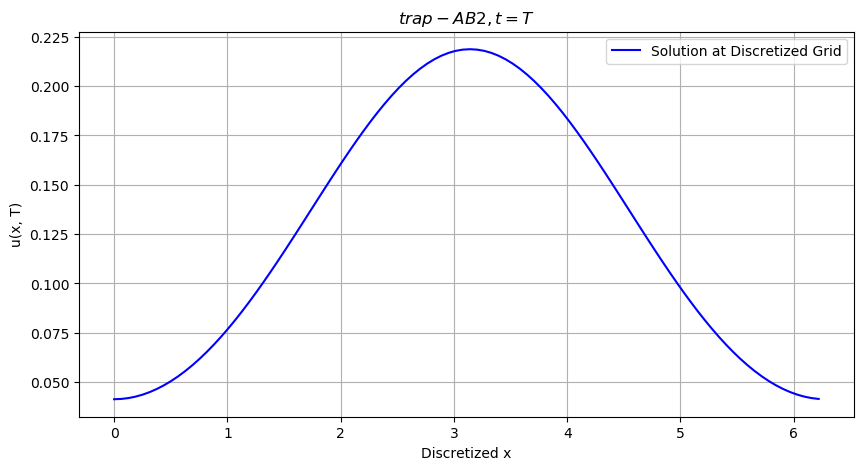

PyObject Text(0.5, 1, '$trap-AB2,t=T$')

In [94]:
# Plotting solution distribution at x=2pi
X = [0:2*pi/100:2*pi;]
figure(1,figsize=(10,5))
plot(X, sol, "b-",label="Solution at Discretized Grid")
xlabel("Discretized x")
ylabel("u(x, T)")
legend()
grid("on")
title(L"trap-AB2,t=T")